**Based on healthcare diabetes dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving health care diabetes_7403752_2024_12_28_19_53.csv to health care diabetes_7403752_2024_12_28_19_53.csv


In [ ]:
import os
os.listdir()

['.config', 'health care diabetes_7403752_2024_12_28_19_53.csv', 'sample_data']

In [ ]:
df = pd.read_csv('health care diabetes_7403752_2024_12_28_19_53.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Replacing invalid zero entries with NaN

In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Impute missing values with median

In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


visualizing the data

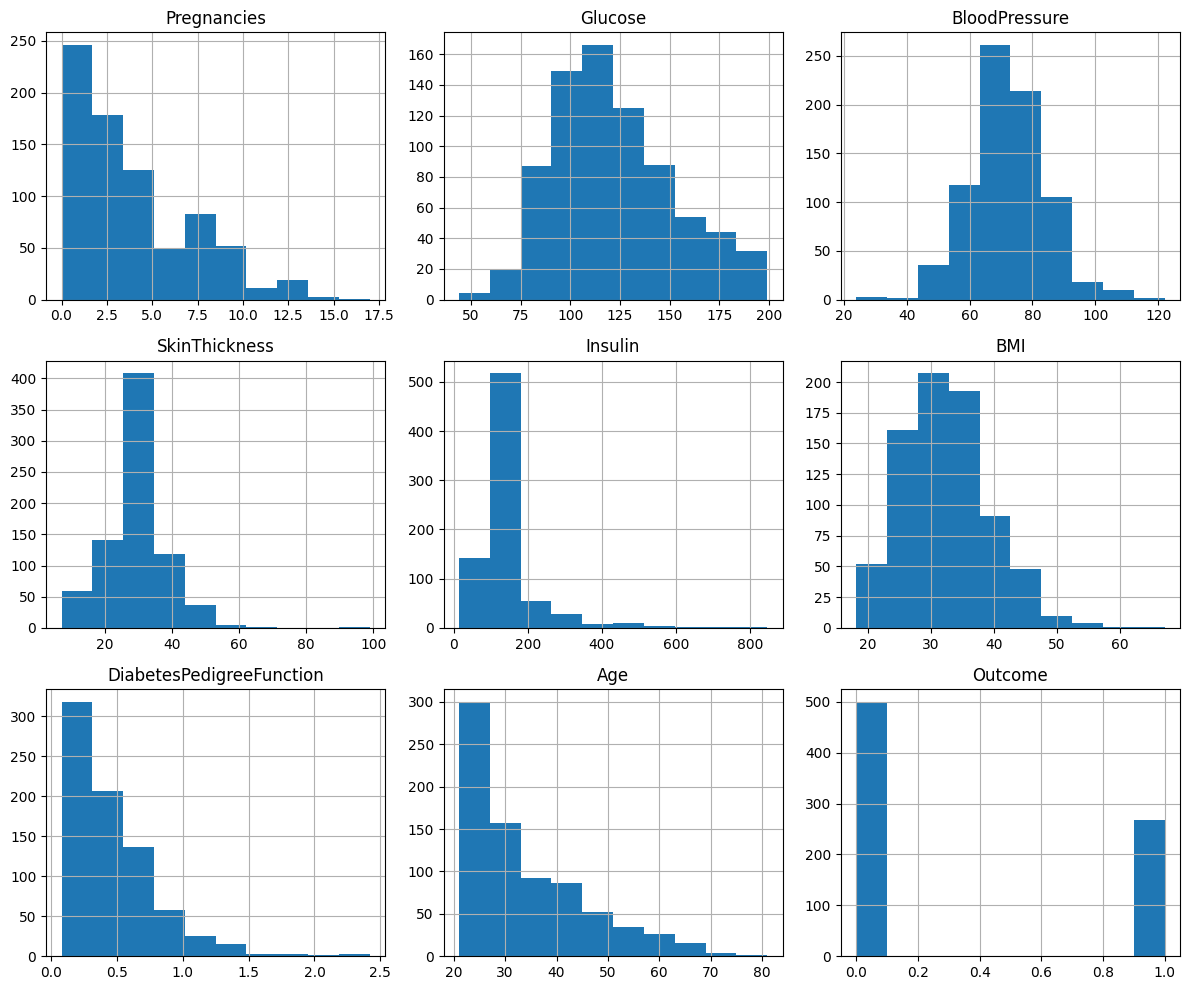

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Insight: The histogram shows the age distribution, indicating most individuals
are in the 20–40 age range, which could be a key demographic for analysis.

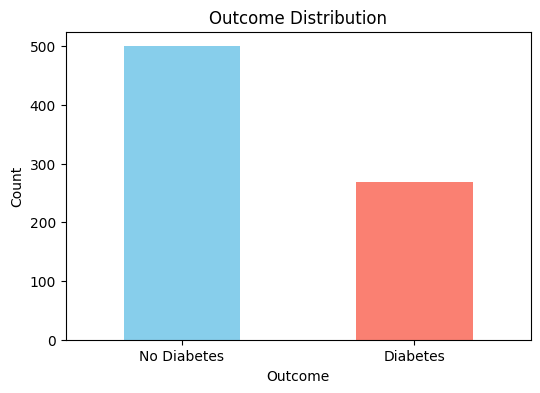

In [ ]:
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

Insight: The bar plot of the Outcome variable reveals an imbalance, with more individuals in the non-diabetic category (Outcome = 0) than diabetic (Outcome = 1). This imbalance could influence model performance and may require techniques like oversampling or undersampling.

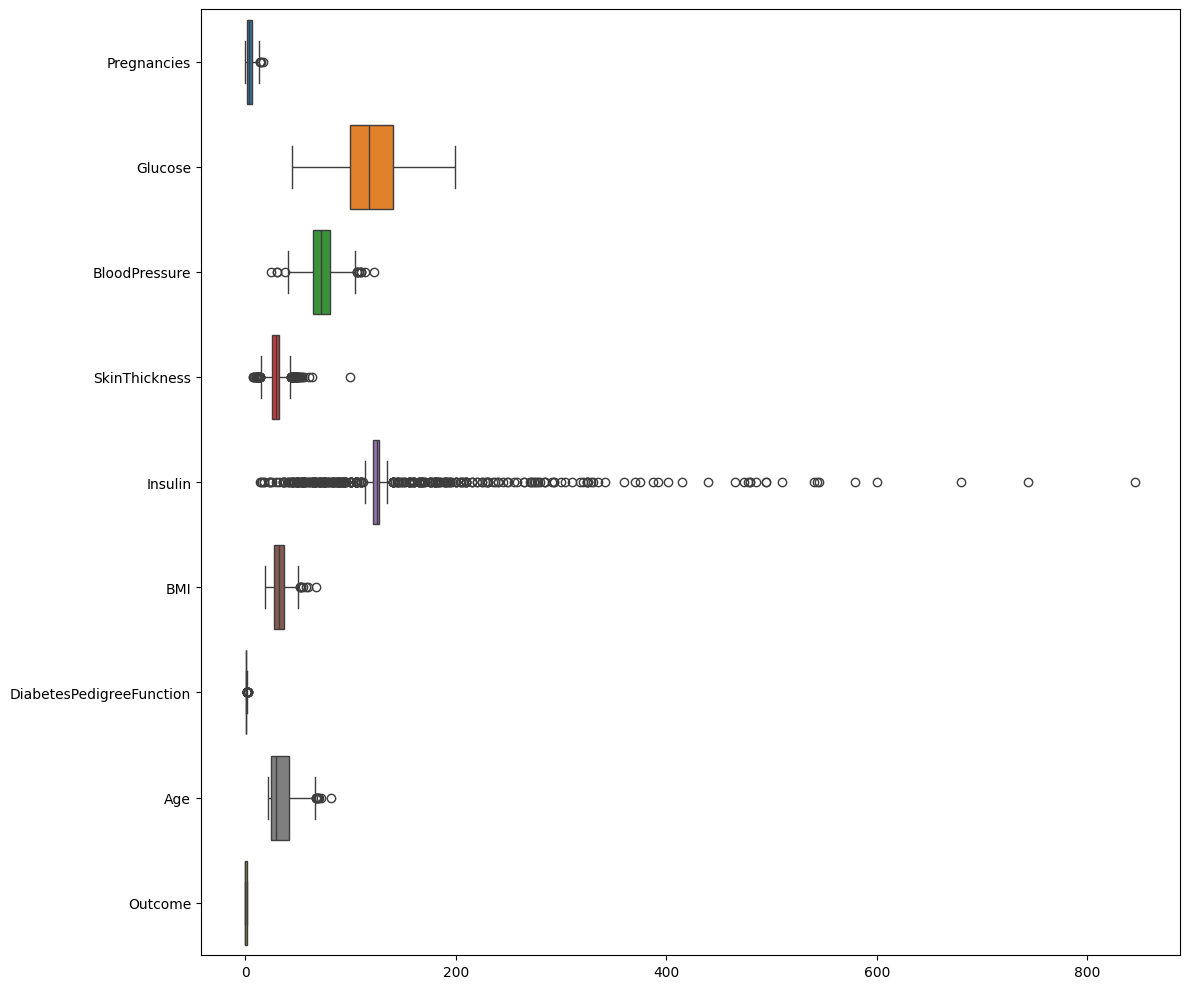

In [ ]:
#Visualize potential outliers using boxplots
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, orient='h')
plt.tight_layout()
plt.show()

Insight: The boxplots reveal potential outliers in variables like Insulin and SkinThickness, with values significantly deviating from the majority. BMI also shows a few extreme values that might impact analysis.

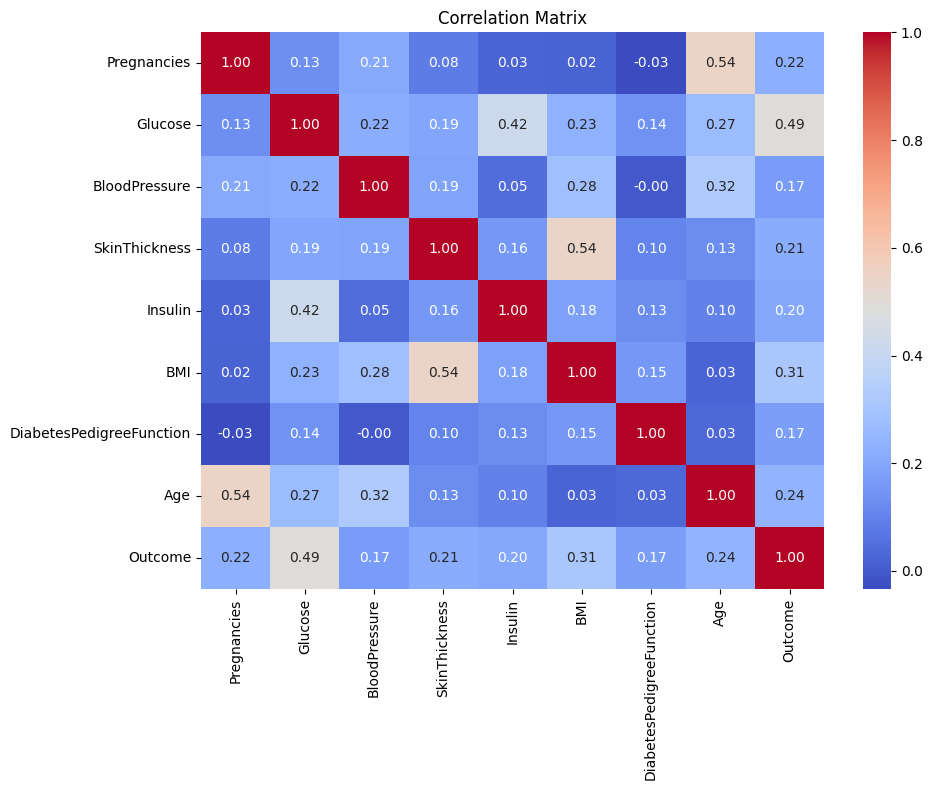

In [ ]:
#heatmap to visualize correlations between different features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Insight: The heatmap highlights a strong positive correlation between Glucose and BMI, suggesting these variables are crucial predictors for the outcome.

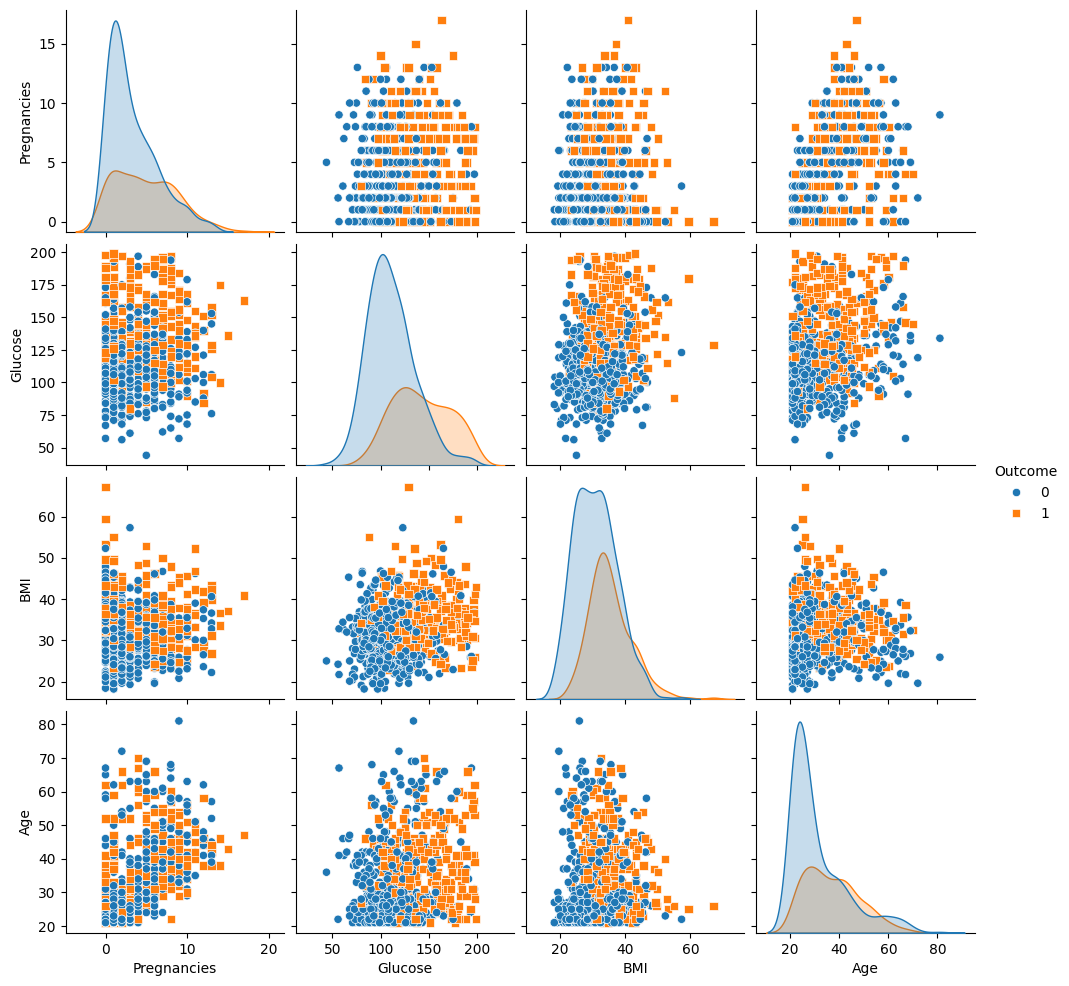

In [ ]:
#pairwise relationships between selected features using scatter plots
sns.pairplot(df[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', markers=["o", "s"])
plt.show()

Insight: A strong positive correlation is evident, where individuals with higher BMI are more likely to exhibit elevated glucose levels. This correlation aligns with known risk factors for diabetes, particularly Type 2.
Clustering can be observed, separating high-BMI, high-glucose individuals (a potential risk group) from others.

SUMMARY:
The exploratory data analysis revealed critical factors influencing diabetes status, such as age, BMI, glucose levels, and blood pressure. The data highlights the working-age population (20–40 years) as a vulnerable group. Correlations between BMI and glucose underscore lifestyle-related risks. Observed patterns and outliers provide a strong foundation for predictive modeling, helping identify high-risk individuals for targeted interventions.